# Credit EDA Case Study

### Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Importing the necessary libaries that required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)     #setting the maximum number of columns and rows

import warnings
warnings.filterwarnings('ignore') # This code is importing the warnings module and 
                                  # then using the filterwarnings function to ignore all warnings.

%matplotlib inline    
#This code is used to display plots in the jupyter notebook.the inline keyword is used to display the plot within the notebook.

# Data Understanding
1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [2]:
# Importing dataset 
def load_dataset(path):                  #The function load_dataset reads in a csv file to a pandas dataframe.
    df = pd.read_csv(path)
    return df

data_path = 'application_data.csv'
app_data = load_dataset(data_path)

In [3]:
#printing first five rows of data from the application data.
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_data.shape

(307511, 122)

application data contains 307511 rows and 122 columns

### Data Handling and Cleaning

In [5]:
app_data.describe() # To get summary statistics of dataset

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In statistical observed that some columns looks good but their are lots  of missing value in some columns.

In [6]:
#Check the datatypes of all the columns of the dataframe
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_data.isna().mean().sort_values(ascending=False)*100 # Checking the percentage of the missing values for all columns

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

It seems to be most of the column have missing values.If more than 40% of the values in a column are missing, it will likely have a significant impact on the analysis.

In [8]:
# Dropping the missing values in the column which more than 40%
app_data = app_data.loc[:, (app_data.isnull().sum()/len(app_data)*100) < 40] # Here we considering the 40 % threshold 

In [9]:
app_data.shape       # Checking the total rows and columns after removing huge missing values column.

(307511, 73)

There are to total 49 columns are removed succesfully which is null value is more than 40%,
Now we have 307511 rows and 73 columns for further analysis

In [10]:
app_data.isna().mean().sort_values(ascending=False)*100    # Checking the remain missing value percentage

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### From the above observation, it is clear that the null value columns have significantly reduced. Next, we will check the values that can be imputed butas seen their are some remain missing values in the dataset column that need to be treated

In [11]:
# Getting the missing values columns that are greater than 0% and less than or equal to 40%.
for mis_val_col in app_data.columns:
    if app_data[mis_val_col].isna().sum() > 0 and (app_data[mis_val_col].isna().sum()/app_data.shape[0])*100 <= 40:
        print(mis_val_col)

AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
OCCUPATION_TYPE
CNT_FAM_MEMBERS
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


There are total 18 columns that have misssing values more than 0 % and less than 40%

### Checking the Outlies and handling Missing values in the remaning columns

#### Problem statemenet:
    Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Lets create another separate dataframe for missing values to check data types and visual overview.

In [12]:
null_val_col = app_data.loc[:, ["AMT_ANNUITY","AMT_GOODS_PRICE","NAME_TYPE_SUITE",
"OCCUPATION_TYPE","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [13]:
null_val_col.head(10)

AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE OCCUPATION_TYPE  \
0      24700.5         351000.0    Unaccompanied        Laborers   
1      35698.5        1129500.0           Family      Core staff   
2       6750.0         135000.0    Unaccompanied        Laborers   
3      29686.5         297000.0    Unaccompanied        Laborers   
4      21865.5         513000.0    Unaccompanied      Core staff   
5      27517.5         454500.0  Spouse, partner        Laborers   
6      41301.0        1395000.0    Unaccompanied     Accountants   
7      42075.0        1530000.0    Unaccompanied        Managers   
8      33826.5         913500.0         Children             NaN   
9      20250.0         405000.0    Unaccompanied        Laborers   

   CNT_FAM_MEMBERS  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0              1.0      0.262949      0.139376                       2.0   
1              2.0      0.622246           NaN                       1.0   
2              1.0      0.555912      0.729567                       0.0   
3              2.0      0.650442           NaN                       2.0   
4              1.0      0.322738           NaN                       0.0   
5              2.0      0.354225      0.621226                       0.0   
6              3.0      0.724000      0.492060                       1.0   
7              2.0      0.714279      0.540654                       2.0   
8              2.0      0.205747      0.751724                       1.0   
9              1.0      0.746644           NaN                       2.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       1.0   
7                       0.0                       2.0   
8                       0.0                       1.0   
9                       0.0                       2.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   
5                       0.0                 -2536.0   
6                       0.0                 -1562.0   
7                       0.0                 -1070.0   
8                       0.0                     0.0   
9                       0.0                 -1673.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        0.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0             

In [14]:
# Checking the datatypes for each missing values column.

In [15]:
null_val_col.dtypes

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [16]:
# Checking the outlier for above missing value column both categorical and numerical

#### AMT_ANNUITY

Here is the AMT_ANNUITY column is numerical variable column and its missing percentage is 0.003902. 

In [17]:
# checking for outliers using percetile
app_data['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

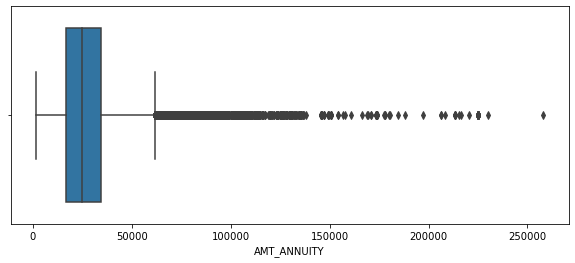

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(app_data['AMT_ANNUITY'],)
plt.show()

In this boxplot we clearly identify their is outlier present in the AMT_ANNUITY column.The outlier far from (Q3+IQR)maximum range.so we can do imputation but its not necessary to perfrom as mentioned problem statement hint.

#### AMT_GOODS_PRICE

AMT_GOODS_PRICE column for Goods price of good that client asked for (if applicable) on the previous application. In this column missing value percentage is  0.090403 and it is numerical variable column. 

In [19]:
app_data['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
10%      1.800000e+05
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

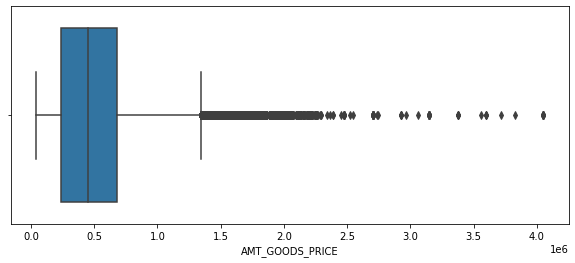

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(app_data['AMT_GOODS_PRICE'],)
plt.show()

In this boxplot we clearly identify their is outlier present in the AMT_GOODS_PRICE column.The outlier far from (Q3+IQR)maximum range.so we can do imputation but its not necessary to perform as mentioned problem statement.

#### NAME_TYPE_SUITE

NAME_TYPE_SUITE column for who was accompanying client when he was applying for the loan is a categorical column with missing percentage is 0.420148 

In [21]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

By performing value counts it is noticed that majority of values lies in 'Unaccompained' value. we can impute the mode value by 'Unaccompained' in place of missing value.

In [22]:
# replacing the null values with mode of unacompained  values.
app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [23]:
app_data['NAME_TYPE_SUITE'].isna().mean()*100 # checking the null values present in the dataset

0.0

#### OCCUPATION_TYPE 

In [24]:
app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Here in occcupation type column, we observed that laborers are the major category applied for loans but the best way is to create another object category as 'other' instead of filling it with mode.It will maintain balance data in occupation

In [25]:
app_data['OCCUPATION_TYPE'].fillna(value = 'Others', inplace = True)

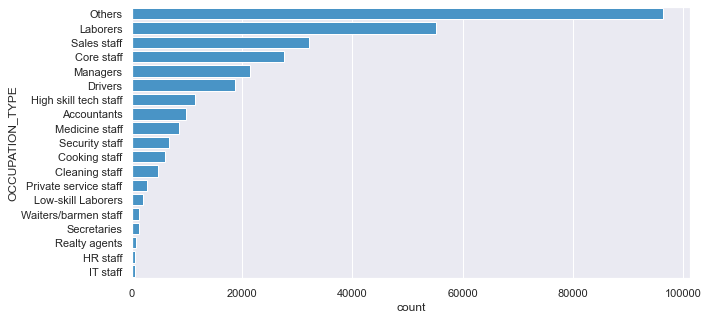

In [26]:
plt.figure(figsize=[10,5])
sns.set(style="darkgrid")
sns.countplot(data = app_data, y = "OCCUPATION_TYPE", color = "#3498DB", order = app_data["OCCUPATION_TYPE"].value_counts().index)
plt.show()

#### EXT_SOURCE_2

EXT_SOURCE_2 column it is normalized values and numerical variables with missing percentage is  0.214626.

In [27]:
app_data['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
10%      2.156892e-01
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
99%      7.827928e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

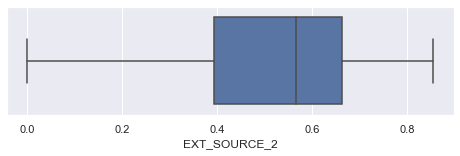

In [28]:
plt.figure(figsize=(8,2))
sns.boxplot(app_data['EXT_SOURCE_2'],)
plt.show()

In this boxplot we clearly identify their is no outlier present in the EXT_SOURCE_2 column.so we can do impute the missing values by its using mean of the column.

In [29]:
ext_source_2_mean = app_data['EXT_SOURCE_2'].mean()
app_data['EXT_SOURCE_2'] = app_data['EXT_SOURCE_2'].fillna(ext_source_2_mean)

In [30]:
app_data['EXT_SOURCE_2'].isna().mean()*100 # Checking the outlier

0.0

#### CNT_FAM_MEMBERS

CNT_FAM_MEMBERS is column for how many family members does client have, its is numerical column with missing percentage 0.000650 

In [31]:
app_data[app_data['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN   Unaccompanied  Commercial associate   
187348      29250.0              NaN   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                       3.0                       0.0   
187348      0.670652                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                   -876.0                0                0   
187348                  -654.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15  FLA

In [32]:
app_data['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

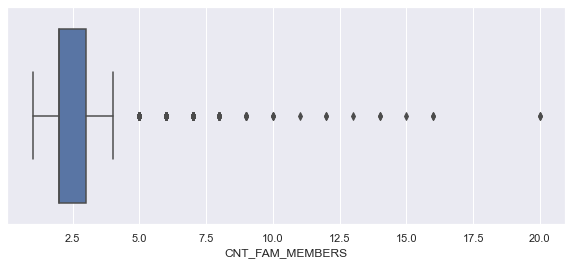

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(app_data['CNT_FAM_MEMBERS'],)
plt.show()

In this boxplot we clearly identify their is outlier present in the CNT_FAM_MEMBERS column.The outlier far from (Q3+IQR)maximum range.but this outlier is with meaning, people can have any numbers of family members living with them.
So dropping this column wouldn't make sense.

#### EXT_SOURCE_3

EXT_SOURCE_3 column it is normalized values and numerical variables with missing percentage is 19.825307.

In [34]:
app_data['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
10%           0.227613
25%           0.370650
50%           0.535276
75%           0.669057
99%           0.832785
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

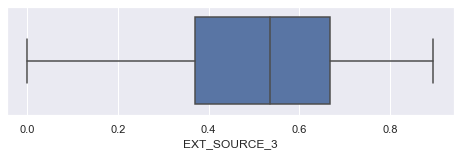

In [35]:
plt.figure(figsize=(8,2))
sns.boxplot(app_data['EXT_SOURCE_3'],)
plt.show()

In this boxplot we clearly identify their is no outlier present in the EXT_SOURCE_3 column.but the null values is very high in percentage its is 19.825307. so we can drop this column

In [36]:
app_data.drop('EXT_SOURCE_3', axis=1, inplace=True)

#### Number of enquiries for Credit Bureau column

1. AMT_REQ_CREDIT_BUREAU_HOUR -Number of enquiries to Credit Bureau about the client one hour before application	
2. AMT_REQ_CREDIT_BUREAU_DAY  -Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)	
3. AMT_REQ_CREDIT_BUREAU_WEEK -Number of enquiries to Credit Bureau about the client one week before application (excluding 4. one day before application)	
5. AMT_REQ_CREDIT_BUREAU_MON  -Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)	
6. AMT_REQ_CREDIT_BUREAU_QRT  -Number of enquiries to Credit Bureau about the client 3 month before application (excluding 7. one month before application)	
8. AMT_REQ_CREDIT_BUREAU_YEAR -Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)	


These are all numerical columns with missing percentage 13.50 . this values for number of enquiries for customer tried to contact credit bureau.we can plot box plot here check outliers

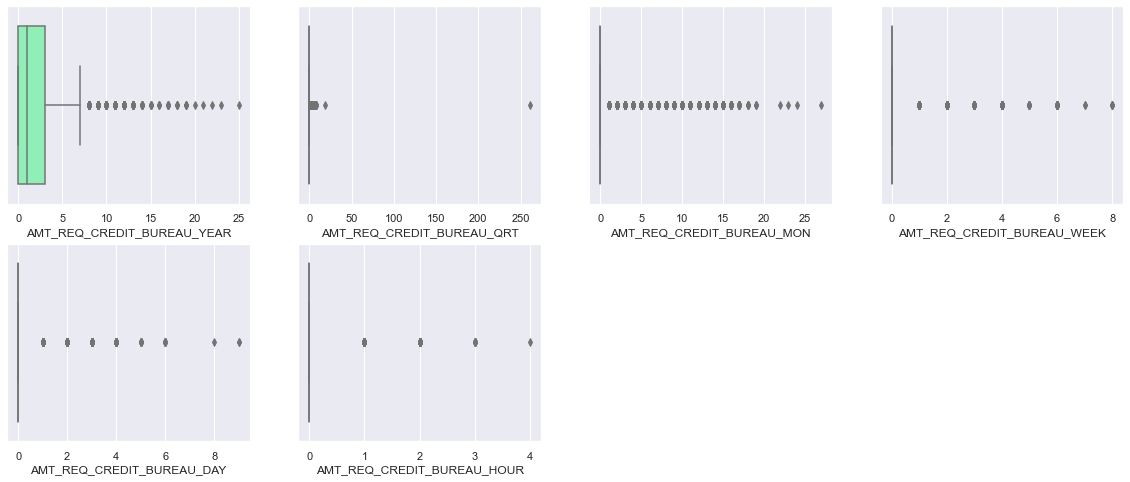

In [37]:
plt.figure(figsize=(20,8))
credit_bureau = ['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']

for i in enumerate(credit_bureau):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(app_data[i[1]],palette='rainbow')

From above box plot its observed that there is many outliers present in the credit bureau columns'. we will not replace the value with mode and median due to higher percentage of missing values in this column, it might be unfairness for present data.

#### OBS_30_CNT_SOCIAL_CIRCLE

OBS_30_CNT_SOCIAL_CIRCLE is a column for How many observation of client's social surroundings with observable 30 DPD (days past due) default. It is a numerical variable column with missing percentage 0.332021.

In [38]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]) # Checking the stastiscal percentage

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          10.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

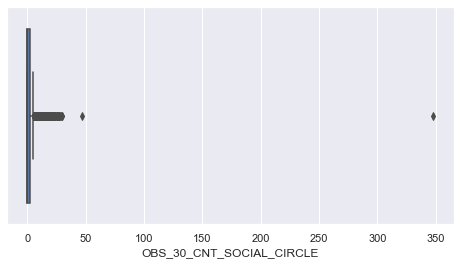

In [39]:
plt.figure(figsize=(8,4))                            # Checking the outlier present in the dataset
sns.boxplot(app_data['OBS_30_CNT_SOCIAL_CIRCLE'],)
plt.show()

From above graph observed that the outlier is far from max data. we can fill value with median to there not be any unbalanced data.

In [40]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [41]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna().mean()*100 # Checking the outlier

0.0

### Checking with other data columns

#### CODE_GENDER Column

This column represents the gender category in dataset

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


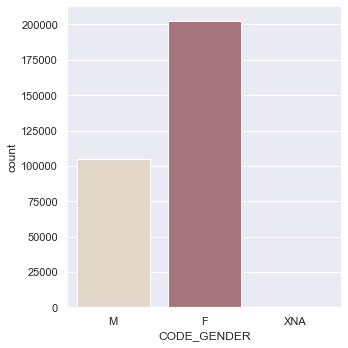

In [42]:
print(app_data['CODE_GENDER'].value_counts())
sns.catplot(x="CODE_GENDER", kind="count", palette="ch:.25", data=app_data);
plt.show()

It is seem to be female applicants are highest category after before male. but XNA type may imply that the customer may not wish to specify gender or its to be missed while data collecting.

In [43]:
# Count in of XNA is very low so we can impute code gender column with 'F'
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### DAYS_BIRTH 

DAYS_BIRTH column for Client's age in days at the time of application

In [44]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Days birth column can not be negative.Also need to convert data into seprate year column.

In [45]:
app_data['DAYS_BIRTH'] = abs(app_data['DAYS_BIRTH'])

In [46]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [47]:
# Creating a new column for year birth to show days value in year.
app_data['YEARS_BIRTH'] = app_data['DAYS_BIRTH'] / 365

In [48]:
app_data['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

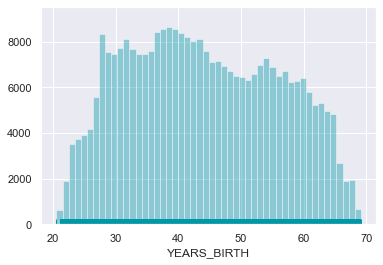

In [49]:
sns.distplot(app_data['YEARS_BIRTH'], kde=False, rug=True, color ='#0097A7');

- As in distribution plot the age column shows that the application starts from minimum 21 to maximum 69. Most of the applicant from 27-45 age group of people.

#### NAME FAMILY STATUS

NAME FAMILY STATUS is a categorical column for family status of customer.

In [50]:
app_data['NAME_FAMILY_STATUS'].value_counts() #checking the column values

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

It is observed that the unknown column indicates that value not specified by applicant or missing data.

In [51]:
app_data.loc[app_data['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = 'Married'

<Figure size 576x144 with 0 Axes>

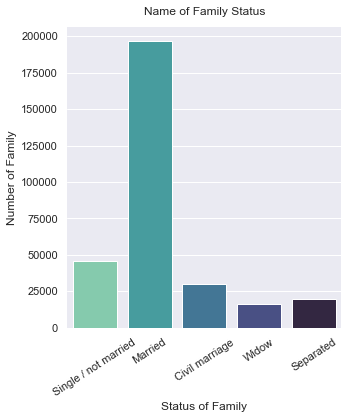

In [52]:
plt.figure(figsize=(8,2))
sns.catplot(x="NAME_FAMILY_STATUS",palette="mako_r",kind="count",data=app_data)
plt.xticks(rotation= 33)
plt.title("Name of Family Status",y=1.02)
plt.xlabel("Status of Family")
plt.ylabel("Number of Family")
sns.despine(left=True,bottom=True)
plt.show()

- It is observed that from above column chart married people are mostly applied for loan followed by single and unmarried.
- Widows are the least number application for loan.

#### Days Employed

Days Employed is a column for how many days before the application the person started current employment

In [53]:
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Employed days can not be negative also it need to convert in years.

In [54]:
app_data['DAYS_ID_PUBLISH'].value_counts().head()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

In [55]:
app_data.DAYS_ID_PUBLISH.value_counts(normalize=True).head()

-4053    0.000550
-4095    0.000527
-4046    0.000524
-4417    0.000517
-4256    0.000514
Name: DAYS_ID_PUBLISH, dtype: float64

In [56]:
app_data['DAYS_ID_PUBLISH']=app_data['DAYS_ID_PUBLISH'].abs()  # converting Negative values in positive

In [57]:
app_data.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [58]:
app_data['YEARS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH']/365  # Cretating new column which contains values in years
print(app_data.YEARS_ID_PUBLISH)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
app_data.YEARS_ID_PUBLISH.describe()

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: YEARS_ID_PUBLISH, dtype: float64

<AxesSubplot:xlabel='YEARS_ID_PUBLISH'>

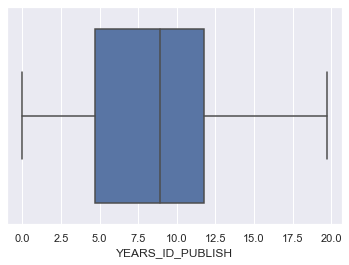

In [60]:
sns.boxplot(x="YEARS_ID_PUBLISH", data=app_data)

The box plot clearly shows that the maximum age of applicant is 19 age. Most of applicants lies betwwin age 5 to 20 years.

#### DAYS_LAST_PHONE_CHANGE

DAYS_LAST_PHONE_CHANGE column for how many days before application did client change phone

In [61]:
app_data.DAYS_EMPLOYED.describe() # Checking the statstics of the column.

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [63]:
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True).head() # returns the normalized counts of the column

 0.0    0.122507
-1.0    0.009144
-2.0    0.007538
-3.0    0.005733
-4.0    0.004179
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [64]:
app_data['DAYS_LAST_PHONE_CHANGE']=app_data['DAYS_LAST_PHONE_CHANGE'].abs() # converting days into positive

In [65]:
app_data['YEARS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE']/365 # Creating column for days into years

In [66]:
app_data.YEARS_LAST_PHONE_CHANGE.describe() # Checking statstics information

count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

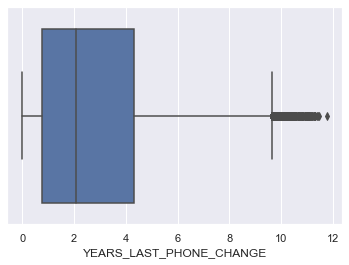

In [67]:
sns.boxplot( x='YEARS_LAST_PHONE_CHANGE', data = app_data) # creating box plot for checking outlier
plt.show()

There is outliers present in the column. applicant age between 0 to maximum 11.
Its seems to the most of the applicants have changed their ID in 1 to 4 years range.

# Data Analysis 

#### Chekcing for data imbalnce for TARGET coloumn

<AxesSubplot:xlabel='TARGET', ylabel='count'>

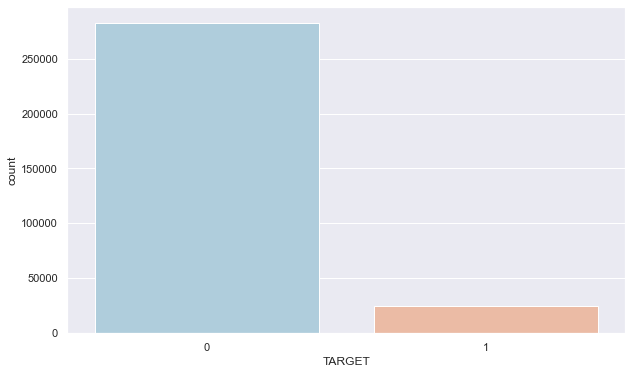

In [68]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x='TARGET',data=app_data,palette='RdBu_r')

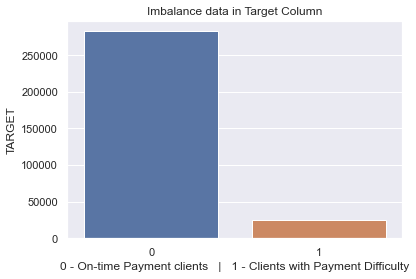

In [69]:
# TARGET column contains value 1 and 0
# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
# 0 - all other cases considering as on time payment
sns.countplot(data=app_data, x='TARGET')
plt.xlabel('0 - On-time Payment clients   |   1 - Clients with Payment Difficulty')
plt.ylabel('TARGET')
plt.title('Imbalance data in Target Column')
plt.show()

In [70]:
print(app_data['TARGET'].value_counts(normalize = True)*100)
print(app_data.groupby('TARGET').size()[0]/app_data.groupby('TARGET').size()[1]) # Checking the exact rato of target column.

0    91.927118
1     8.072882
Name: TARGET, dtype: float64
11.387150050352467


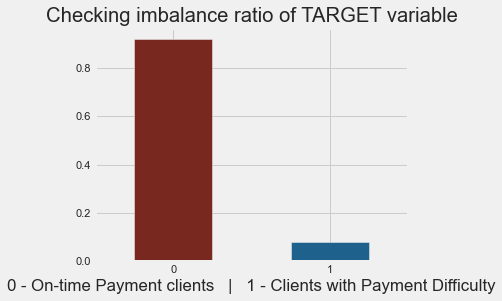

In [71]:
# Applying normalization to find data imbalance
plt.style.use('fivethirtyeight')
plt.figure(figsize = [5,4])
app_data['TARGET'].value_counts(normalize=True).plot.bar(color=['#78281F', '#1F618D'])
plt.title("Checking imbalance ratio of TARGET variable")
plt.xticks(rotation = 0)
plt.xlabel("0 - On-time Payment clients   |   1 - Clients with Payment Difficulty")
plt.show()

- It appears that 1 in every 11 applicants has difficulty making payments.
- 91.92% of clients have on-time payment, while 8.07% have difficulty with payment. We will split this data into two dataframe to get more insight.

In [72]:
TARGET0 = app_data.loc[app_data.TARGET == 0]
TARGET1 = app_data.loc[app_data.TARGET == 1]

# Univariate Analysis 

In [73]:
# checking all columns with object type data and storing it in a list
object_list =list(app_data.columns[app_data.dtypes=="object"])
object_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [74]:
for i in object_list:
    print("--------------------------------------------------")
    print(f"{i} for clients with payment difficulties")
    print(TARGET1[i].value_counts().sort_values(ascending = False))
    print(f"\n{i} for on-time payment clients")
    print(TARGET0[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payment difficulties
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payment difficulties
F    14170
M    10655
Name: CODE_GENDER, dtype: int64

CODE_GENDER for on-time payment clients
F    188282
M     94404
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payment difficulties
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_CAR for on-time payment clients
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payment difficulties
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype:

In [75]:
%%javascript          # Not part of analysis code for get full view of graphs and avoid scrolling
    IPython.OutputArea.auto_scroll_threshold = 9999 

<IPython.core.display.Javascript object>

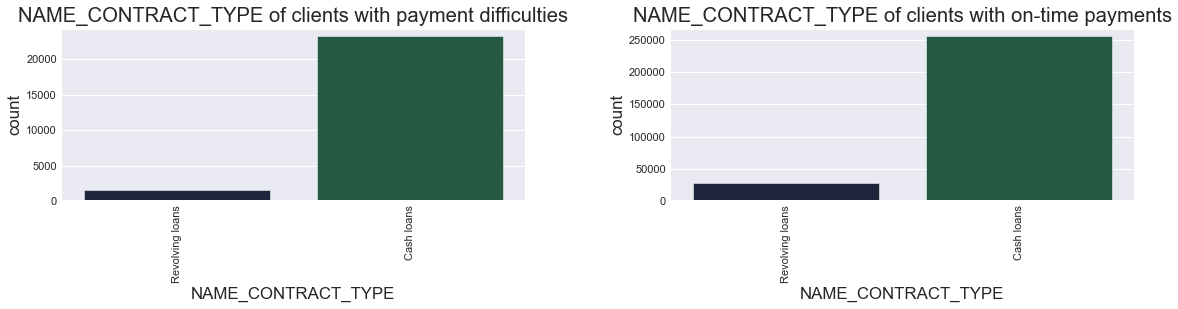

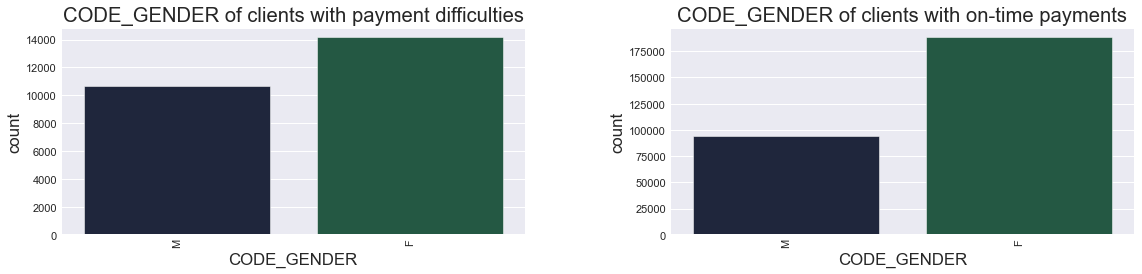

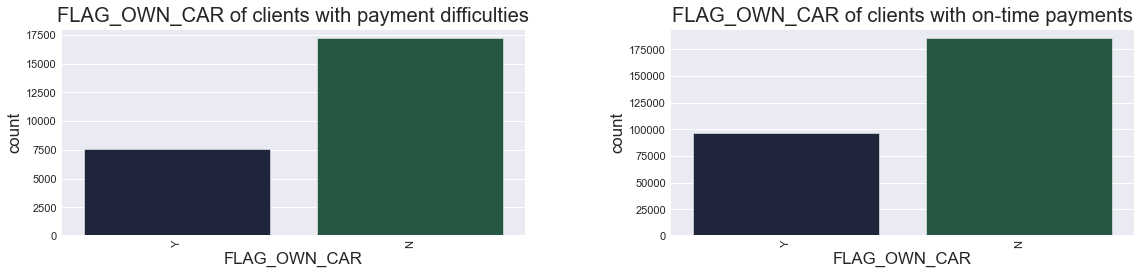

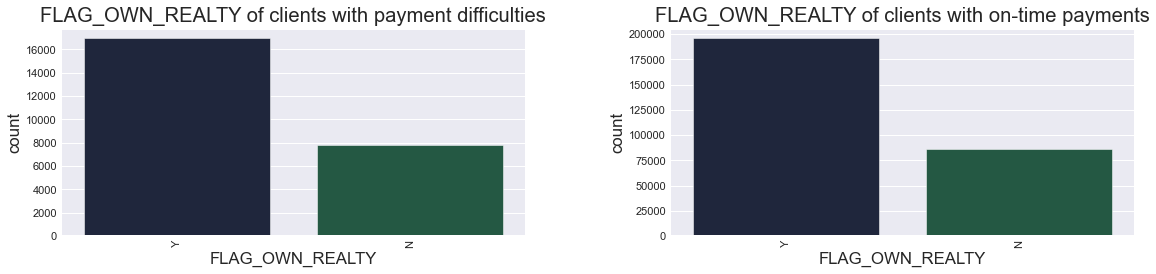

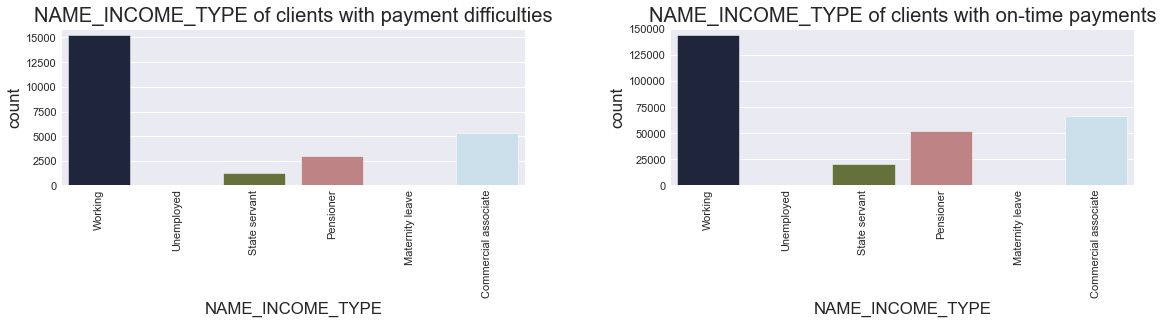

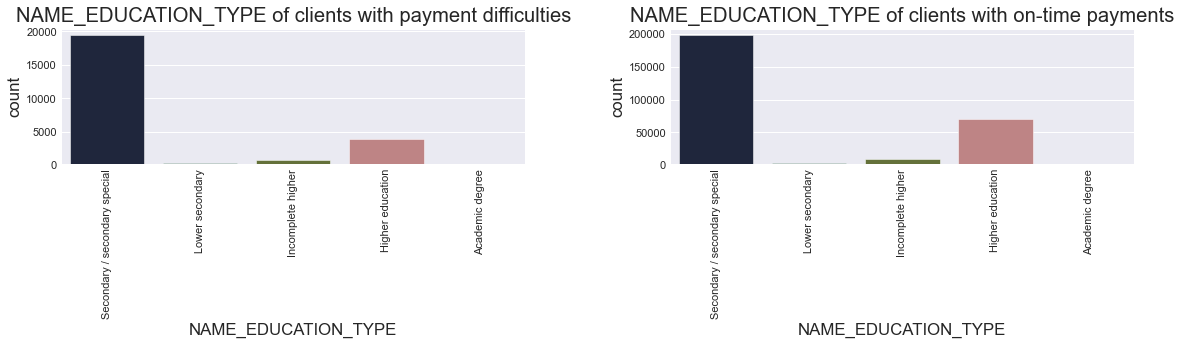

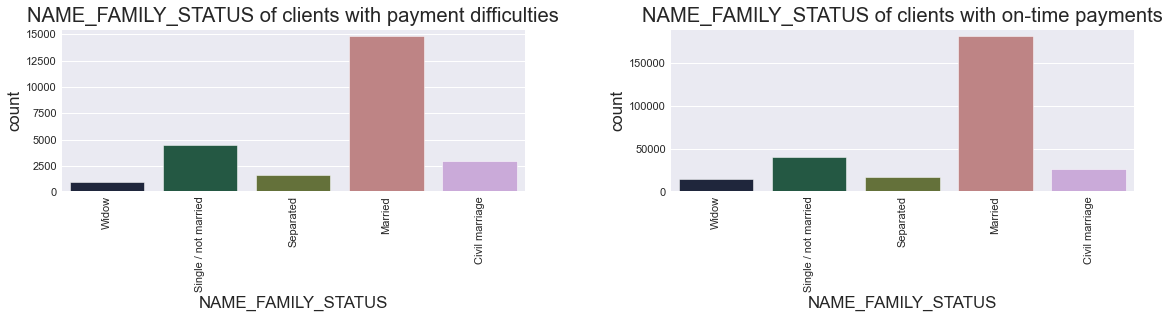

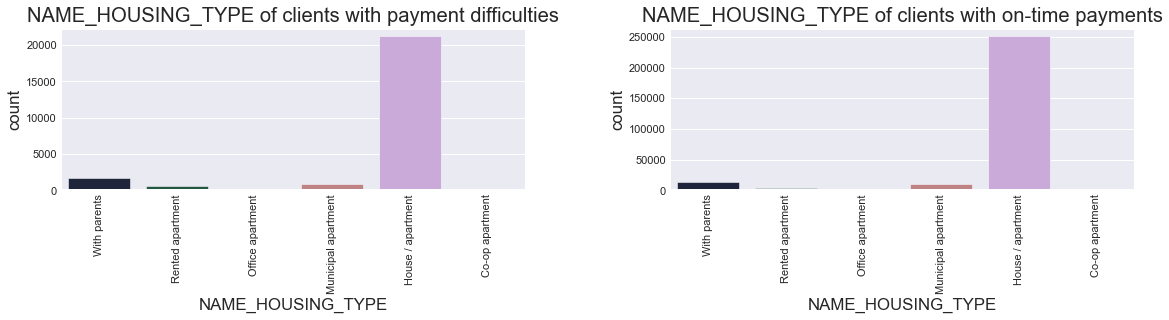

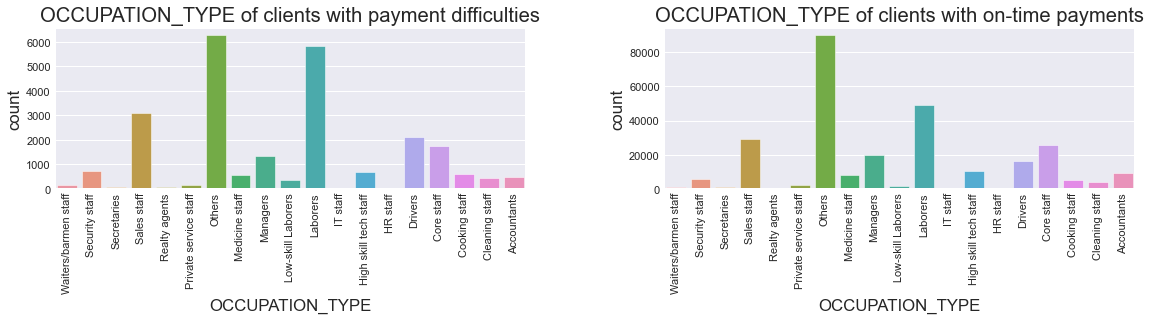

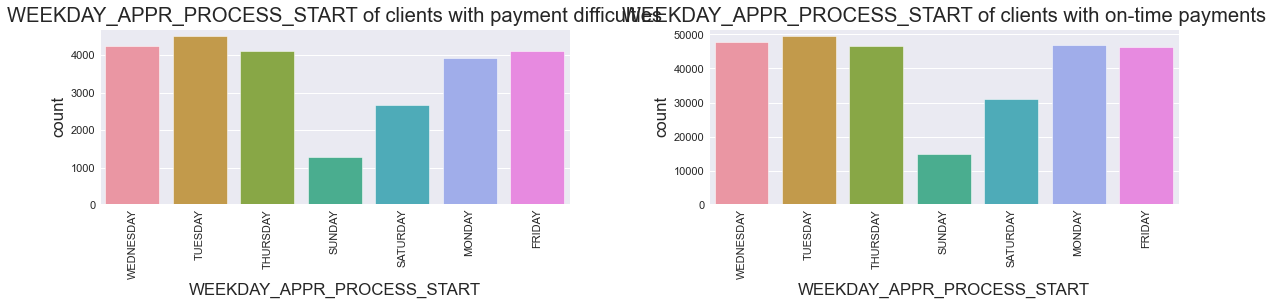

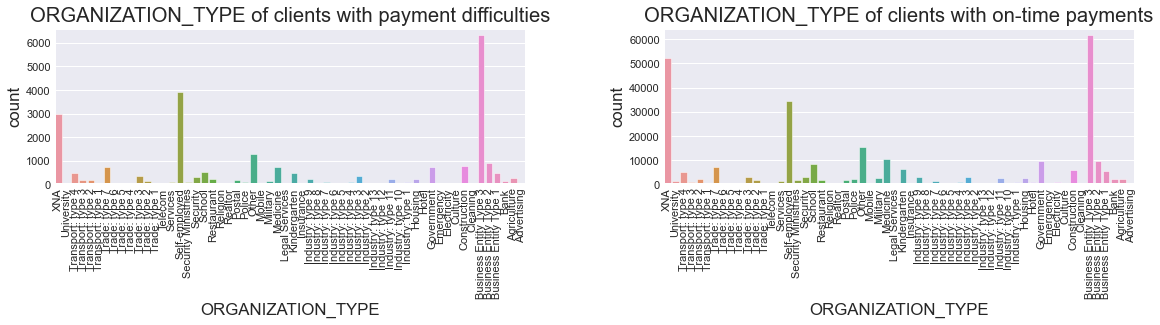

In [76]:
# plotting a count plot in target object columns to getmore insights

count_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

for i in count_plot:
    sns.set_style("darkgrid")
    sns.set_palette("cubehelix")
    plt.figure(figsize = [18,10])
    # for customer with payment difficulties
    plt.subplot(2,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=TARGET1, x =i, order = sorted(TARGET1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    # for on-time payment customer
    plt.subplot(2,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=TARGET0, x =i, order = sorted(TARGET1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 6)
    plt.show()

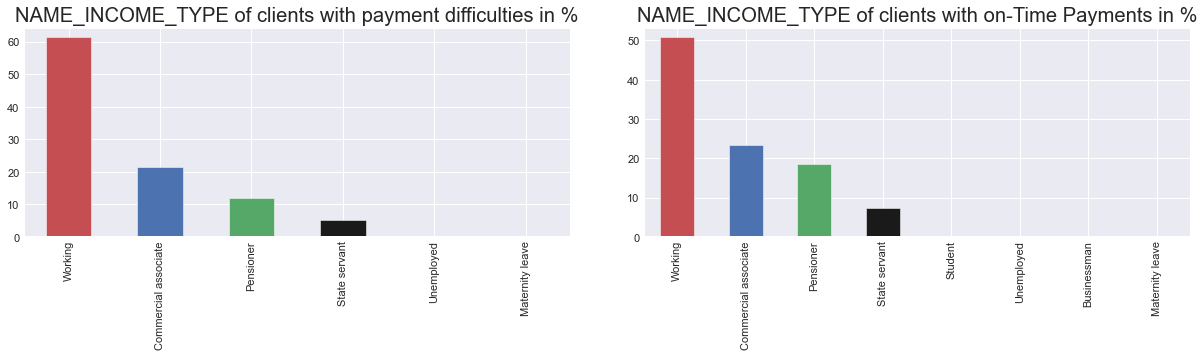

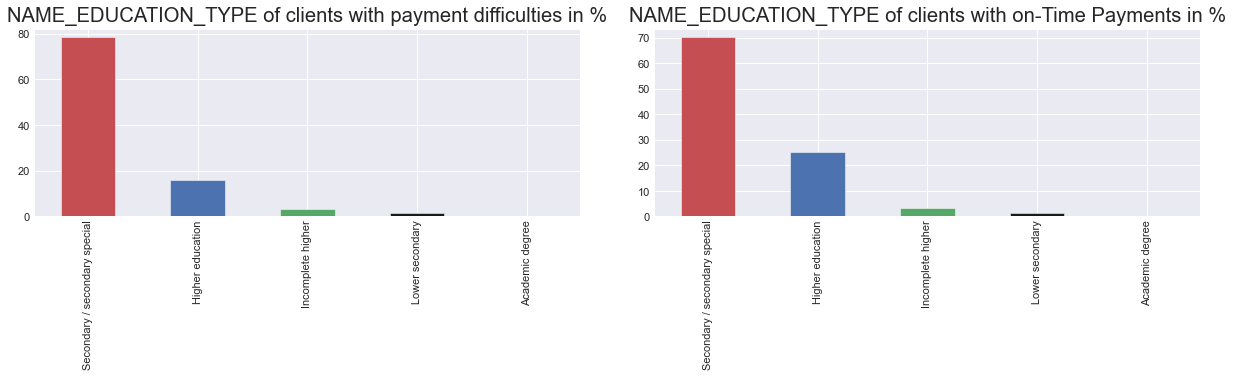

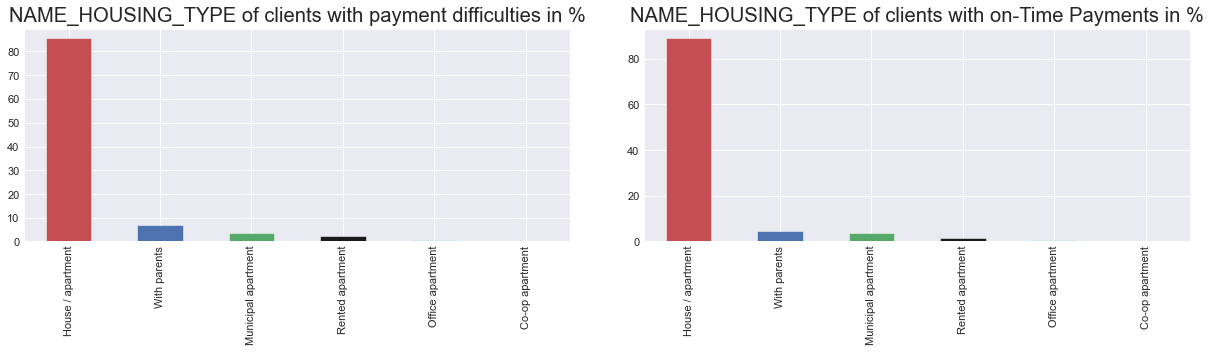

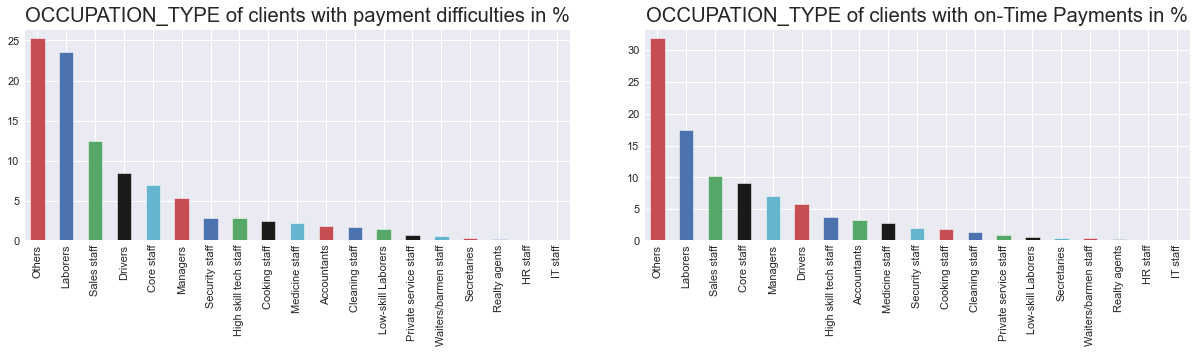

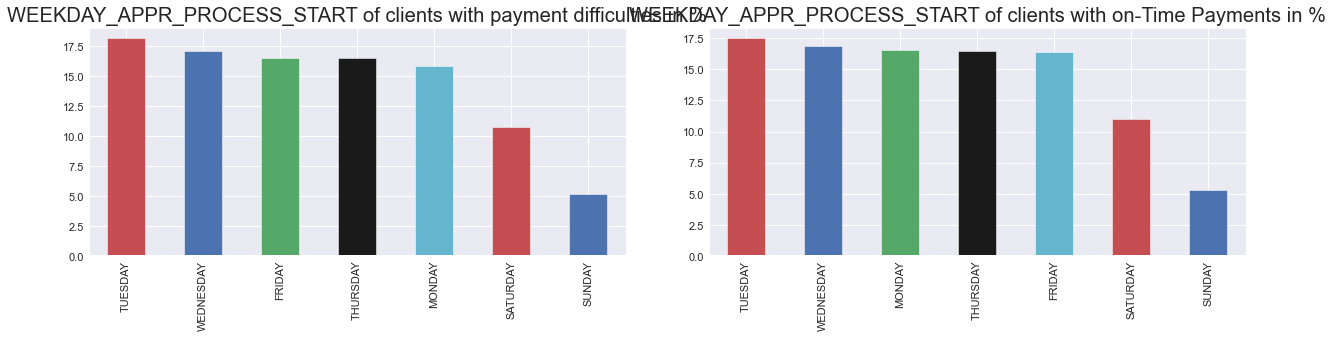

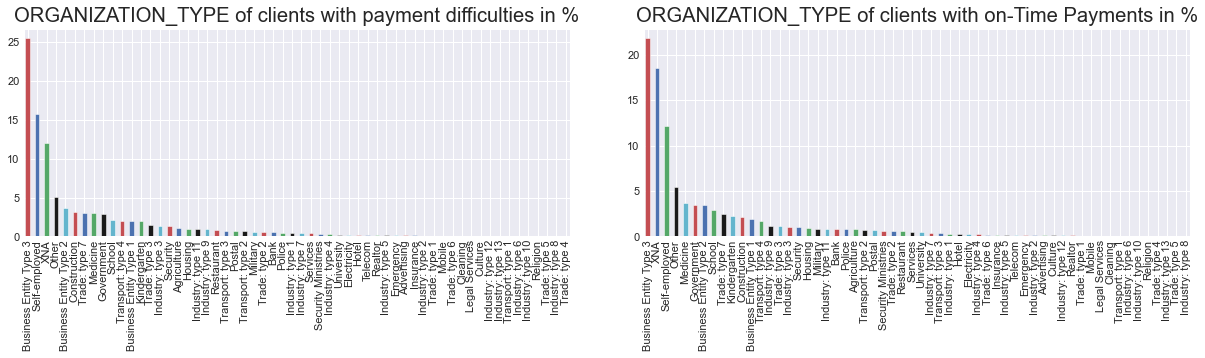

In [77]:
# Plotting a pie chart on TARGET's object columns
bar_plot=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in bar_plot:
    sns.set_style("darkgrid")
    sns.set_palette("Set3")
    plt.figure(figsize = [18,10])
    # for clients with payment difficulties
    plt.subplot(2,2,1)
    (TARGET1[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with payment difficulties in %", color=['r', 'b', 'g', 'k', 'c'])
    plt.xticks(rotation=90)
    # for on-time payment clients
    plt.subplot(2,2,2)
    (TARGET0[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with on-Time Payments in %", color=['r', 'b', 'g', 'k', 'c'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad = 4)
    plt.show()

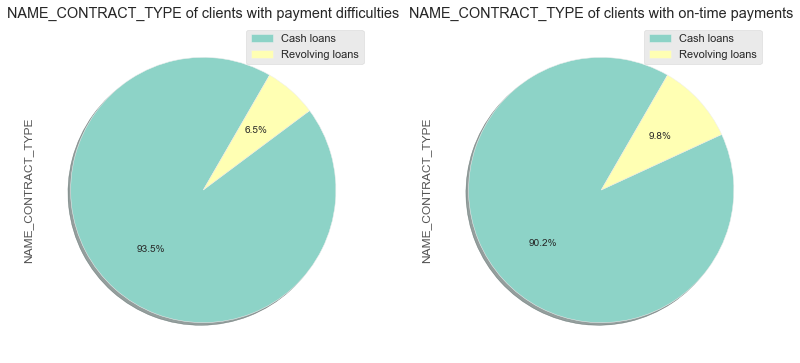

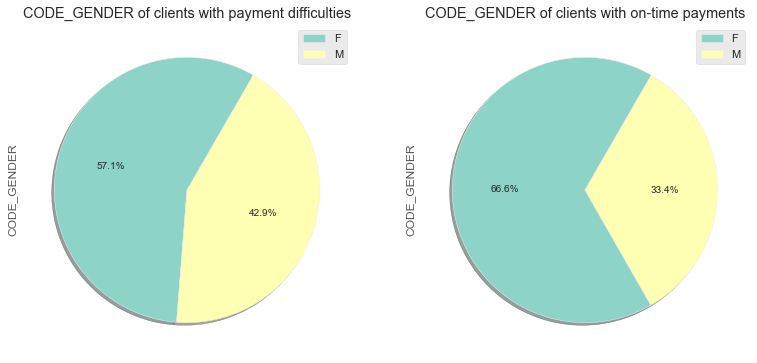

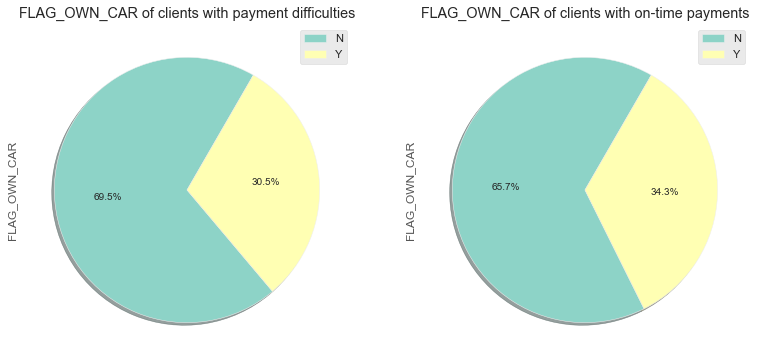

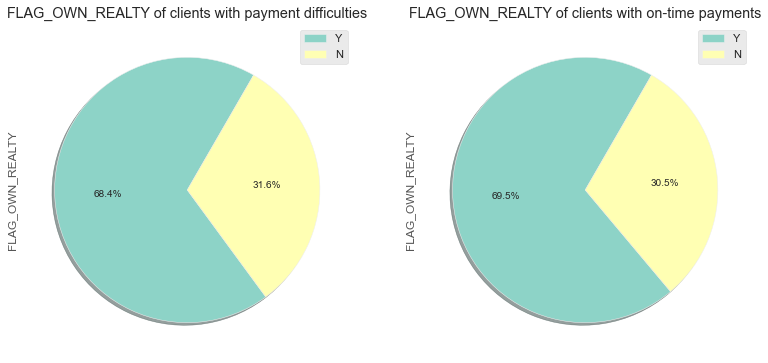

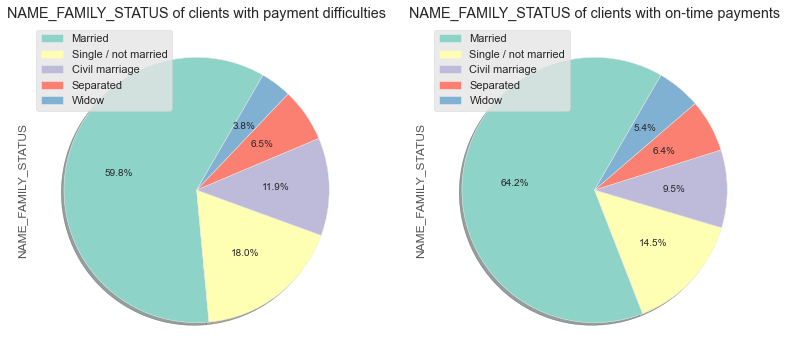

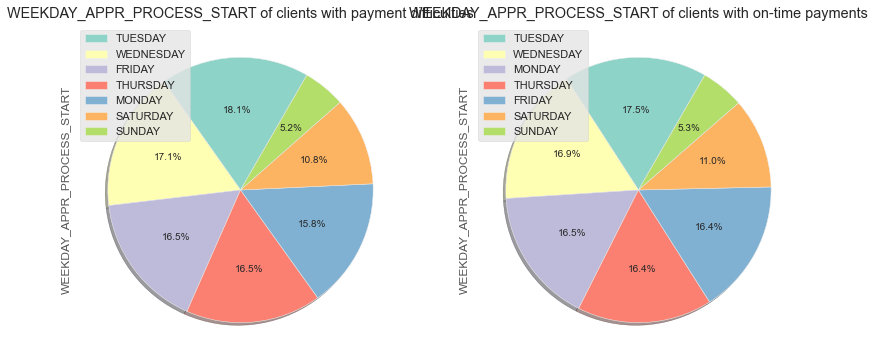

In [78]:
pie_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in pie_plot:
    plt.style.use('ggplot')
    sns.set_palette("Set3")
    plt.figure(figsize = [18,26])
    # for clients with payment difficulties
    plt.subplot(2,3,1)
    plt.title(f'{i} of clients with payment difficulties')
    TARGET1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(2,3,2)
    plt.title(f'{i} of clients with on-time payments')
    TARGET0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.show()

- There is a 5.4% decrease in "Single/not married" values from CODE_GENDER b/w clients with payment difficulties to on-time payments. It's a weak correlation that Single/not married clients have more payment difficulties.
- There is a 4% decrease in " Married" values from CODE_GENDER b/w clients with payment difficulties to on-time payments. It's a weak correlation that Married clients have more payment difficulties.

- The majority of defaulters are cash loan holders, with 93% of them having cash loans as opposed to revolving loans. 6.5% of defaulters have revolving loans.
- There is a higher percentage of female defaulters than male defaulters, with 57.1% of defaulters being female and 42.9% being male.
- A majority of defaulters do not own cars, with 69.5% of them not owning cars and 30.5% owning cars.
- A majority of defaulters own houses, with 68.5% of them owning houses and 30.5% not owning houses.
- The majority of defaulters are from the "working" class, with 59.8% of them being married, 3.8% being widowed, and 18.0% being single/not married.

- The majority of on-time payers are also cash loan holders, with 90.2% of them having cash loans as opposed to revolving loans. 9.8% of on-time payers have revolving loans.
- There is a higher percentage of female on-time payers than male on-time payers, with 66.6% of on-time payers being female and 33.4% being male.
- A majority of on-time payers do not own cars, with 65.7% of them not owning cars and 34.3% owning cars.
- A majority of on-time payers also own houses, with 69.5% of them owning houses and 30.5% not owning houses.
- The majority of on-time payers are also from the "working" class, with 64.2% of them being married, 5.4% being widowed, and 14.5% being single/not married.

In [79]:
# Analysis on Numerical column checking all the numerical column present in dataset

In [80]:
app_data.select_dtypes(include=["int64", "float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FL

In [81]:
# Many columns contains flag columns & other unnecessary columns. Its seem to be unwanted column we will remove the unwanted column.
app_data.columns = [i.replace("FLAG_", "") for i in app_data.columns] # dropping the FLAG_ columns

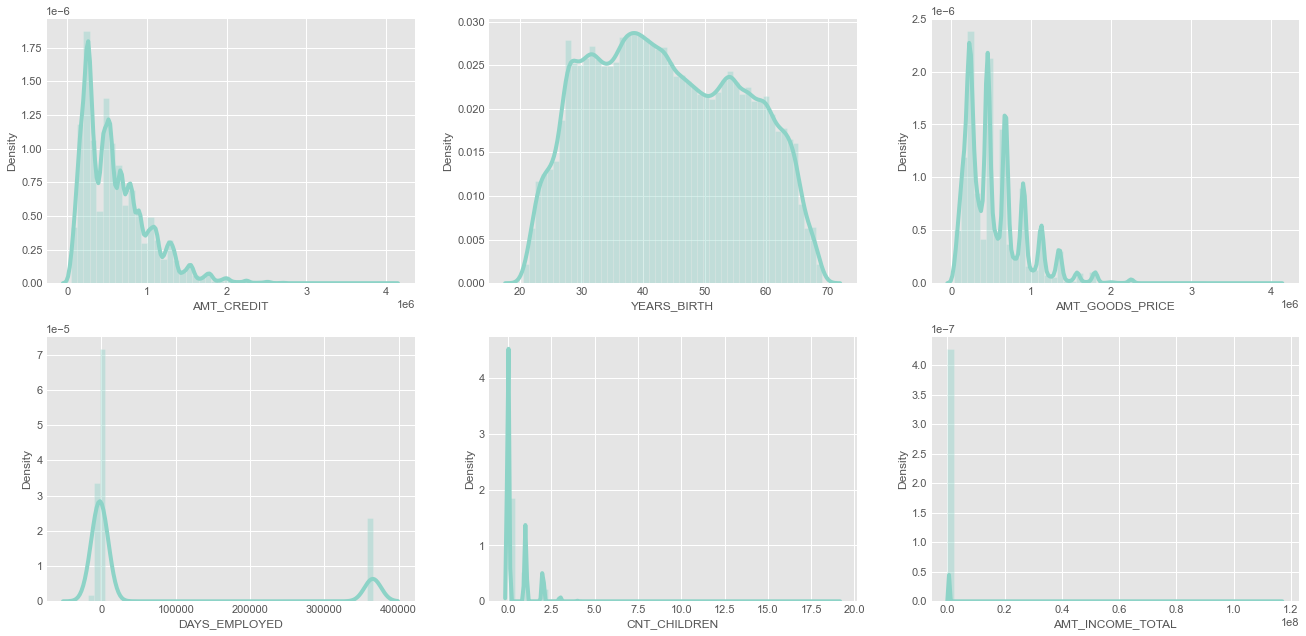

In [82]:
#Performing analysis on  numerical column
num_cols =['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(6):
    row, col = i//3, i%3
    sns.distplot(app_data[num_cols[i]], ax=axes[row,col])
plt.show()

- There is a clear trend that as the AMT_CREDIT and AMT_GOODS_PRICE increase, there are more clients with Payment difficulties. 
- For YEARS_BIRTH, there are more clients with Payment difficulties between 20 and 40, and more clients with on-Time Payments over 40.
- For DAYS_EMPLOYED, there are more clients with Payment difficulties for those employed less than 2000 days, and more clients with on-Time Payments for those employed over 2000 days.  
- For CNT_CHILDREN, there are more clients with on-Time Payments for those with no children, and a few more clients with on-Time Payments for those with 1 or 2 children. 
-Finally, the distributions of AMT_INCOME_TOTAL are significantly different for those with Payment difficulties and those with on-Time Payments, with the former resembling a normal distribution and the latter resembling a lowered normal distribution.

# Bi-Variate and Multivariate Anlysis 

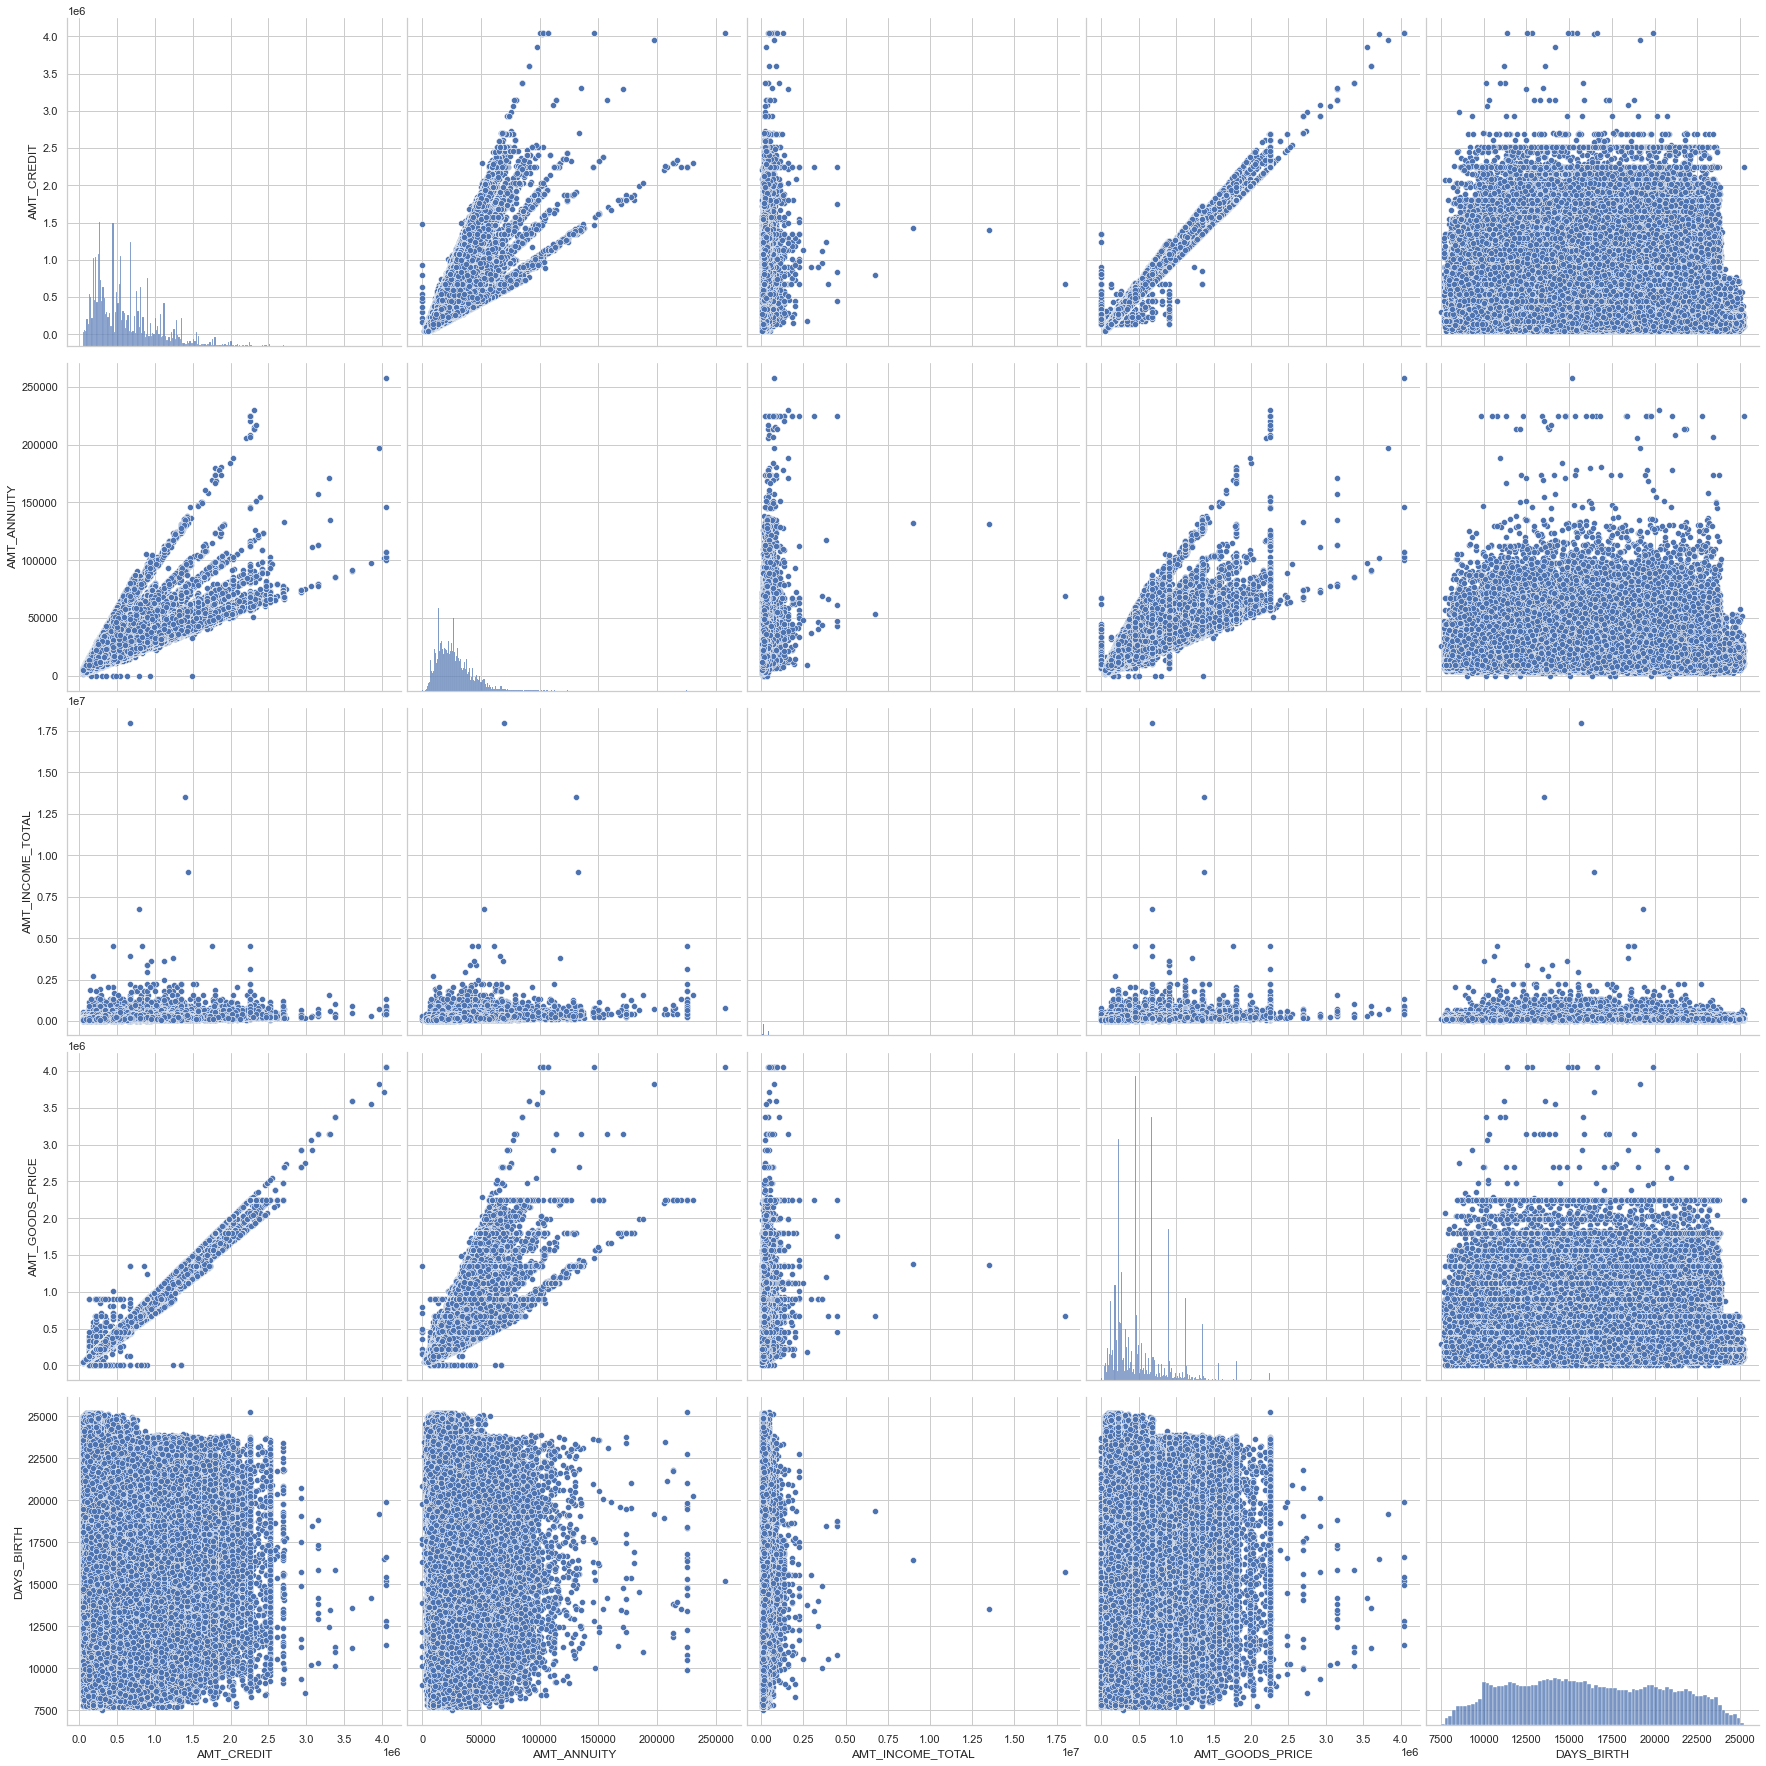

In [83]:
sns.set(palette="Blues", color_codes=True) 
sns.set(style="whitegrid")
pair_1 = TARGET0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair_1, height = 5)
plt.show()

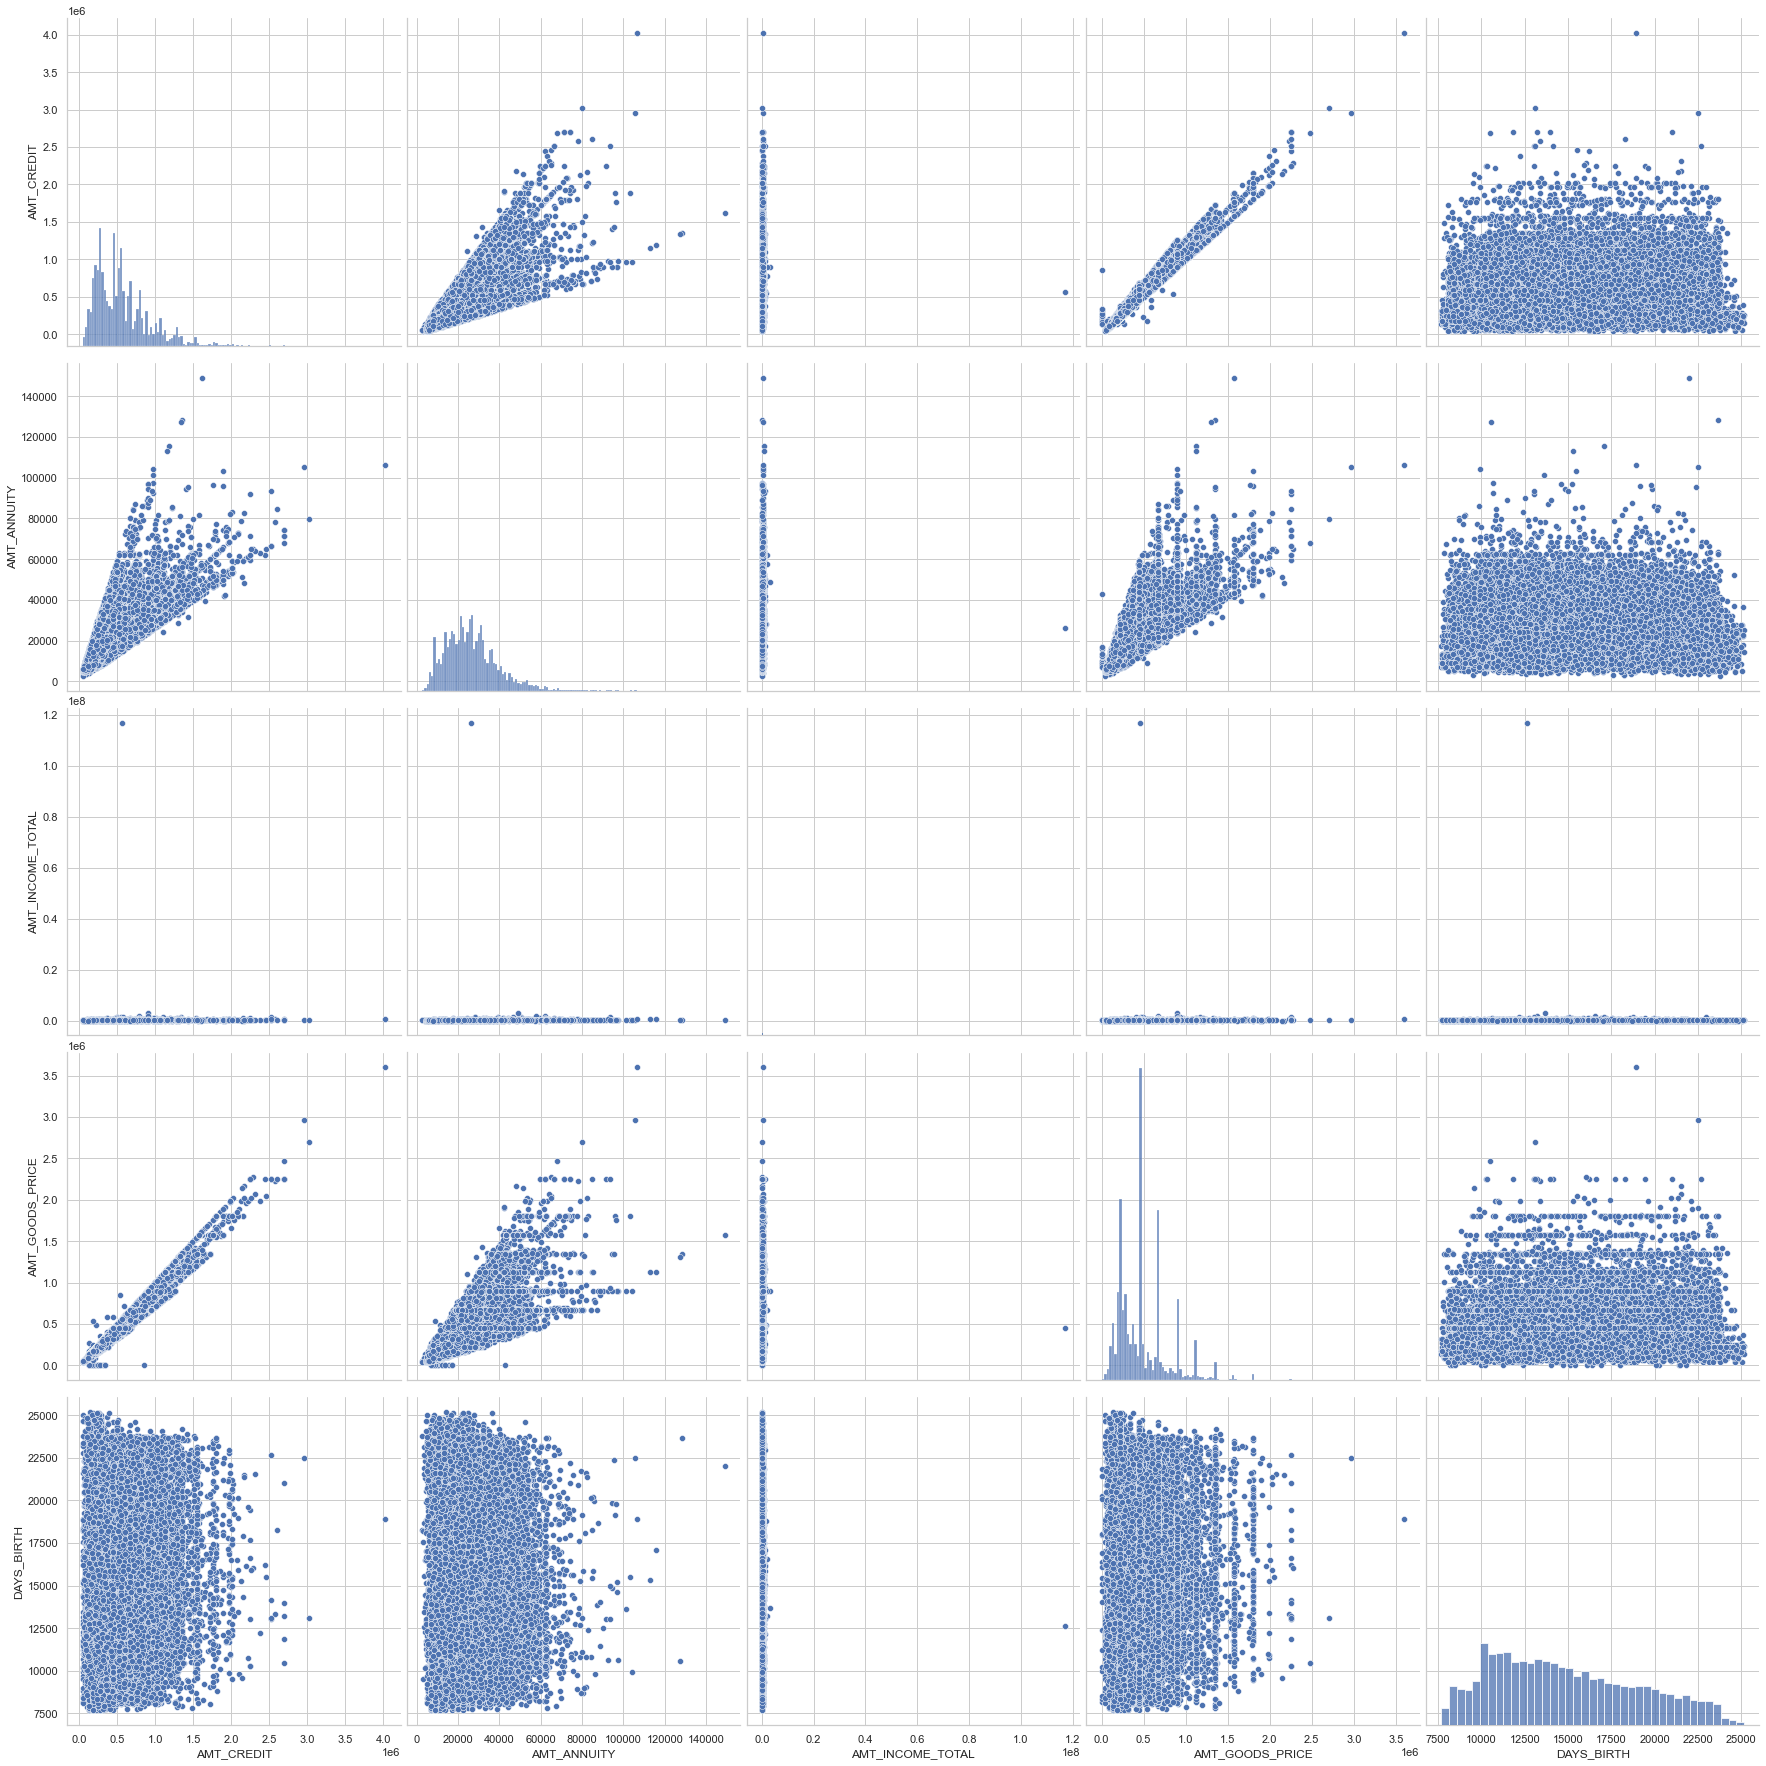

In [84]:
pair_2 = TARGET1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair_2, height=5)

plt.show()

<AxesSubplot:>

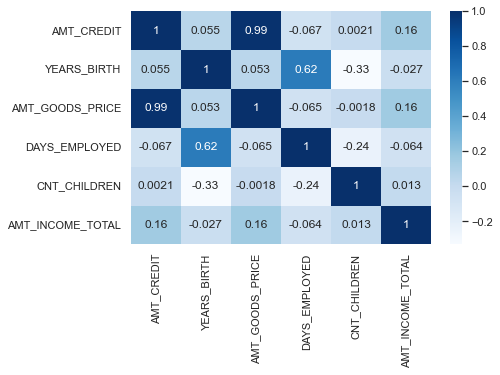

In [85]:
# Creating heatmap for to check correalation for numerical Columns
sns.heatmap(app_data[num_cols].corr(),annot=True,cmap = 'Blues')

In [86]:
#Creating age group bins
app_data['AGE_GROUP']= pd.cut(app_data['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
app_data['AGE_GROUP'].value_counts(normalize=True)*100

(35, 45]    27.405199
(25, 35]    23.512004
(45, 55]    22.788453
(55, 65]    19.705311
(15, 25]     3.954005
(65, 75]     2.635028
Name: AGE_GROUP, dtype: float64

In [87]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'OWN_CAR',
       'OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'MOBIL', 'EMP_PHONE',
       'WORK_PHONE', 'CONT_MOBILE', 'PHONE', 'EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_C

In [88]:
app_data['INCOME_GROUP']= pd.qcut(app_data['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
app_data['INCOME_GROUP'].value_counts(normalize=True)*100

Medium      27.414304
High        24.556195
Low         21.848649
VeryHigh    15.322379
VeryLow     10.858473
Name: INCOME_GROUP, dtype: float64

<Figure size 864x720 with 0 Axes>

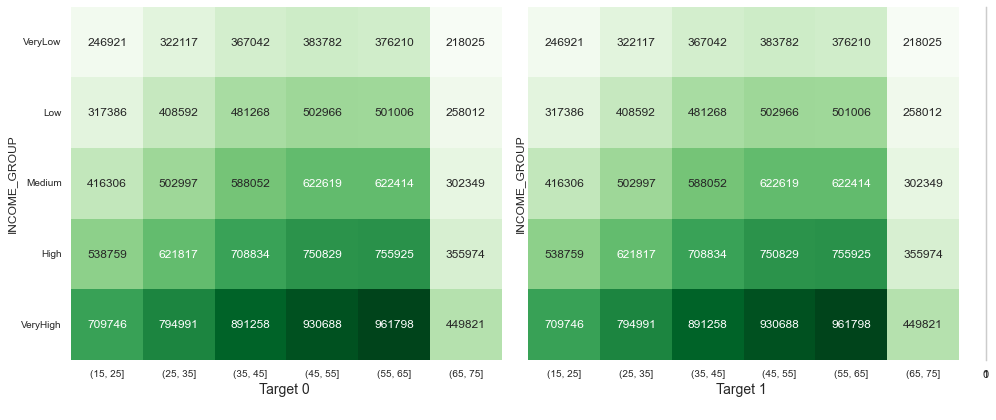

In [89]:
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=app_data, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Greens', fmt="g", ax=ax1, cbar=False)

c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=app_data, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Greens', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

## Conclusion:
In conclusion, the target market for the company are clients in the age range 30-40 and 40-50, female clients who are working, clients who are married, male clients with academic degree, students and businessmen, and repeater clients most targeted for loans


# Previous Application Dataset Analysis

In [90]:
pre_app_data = load_dataset('previous_application.csv') # Loading dataset

In [91]:
pre_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [92]:
pre_app_data.shape

(1670214, 37)

It contains 1670214 rows and 37 columns.

In [93]:
#Checking the data types and null values
pre_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
# Checking the null values percentage.
pre_app_data.isna().mean().sort_values(ascending=False)*100 

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [95]:
pre_app_data = pre_app_data.loc[:, (pre_app_data.isnull().sum()/len(pre_app_data)*100) < 25]

In [96]:
pre_app_data.isna().mean().sort_values(ascending=False)*100 # Checking cmissing value percentage after dropping column

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

There is a three missing values column remains -          
AMT_GOODS_PRICE,
AMT_ANNUITY,                   
CNT_PAYMENT
PRODUCT_COMBINATION,

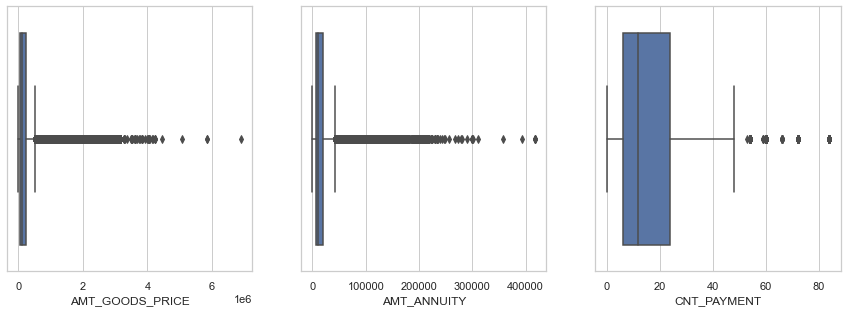

In [97]:
nul_cols2 = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
 
plt.figure(figsize = [18,10])
for i in enumerate(nul_cols2):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(pre_app_data[i[1]])

Its is ok to fill misssing value by its median in all three 'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT' columns.

In [98]:
# Filling the missing value with median
pre_app_data.AMT_GOODS_PRICE.fillna(pre_app_data.AMT_GOODS_PRICE.median(), inplace=True)
pre_app_data.CNT_PAYMENT.fillna(pre_app_data.CNT_PAYMENT.median(), inplace=True)
pre_app_data.AMT_ANNUITY.fillna(pre_app_data.AMT_ANNUITY.median(), inplace=True)

In [99]:
# For Product combination categorical data filling it by missing value
pre_app_data.PRODUCT_COMBINATION.fillna(pre_app_data.PRODUCT_COMBINATION.mode()[0], inplace=True)

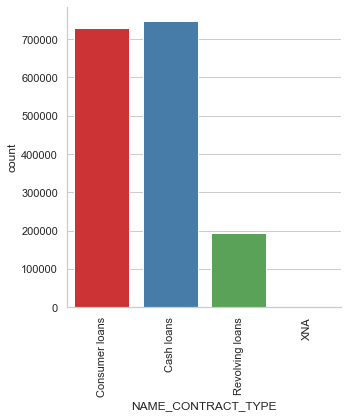

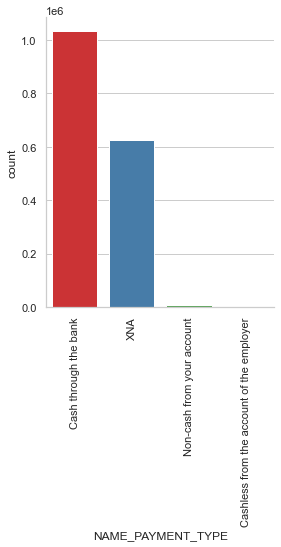

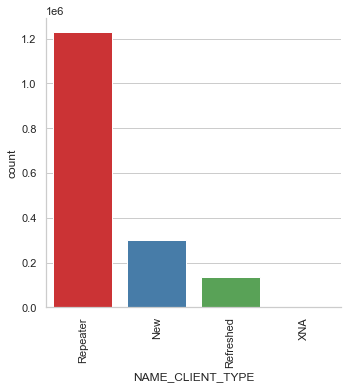

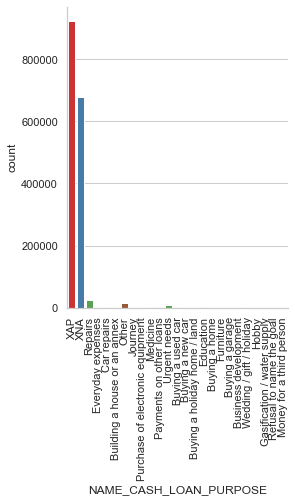

In [100]:
categorical_col = ['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']

for col in categorical_col:
    sns.catplot(x=col, kind="count", palette="Set1", data=pre_app_data)
    plt.xticks(rotation=90)
    plt.show()

Its observed a cash loans seem not to have been cancelled, while consumer loans have refused more often than cash loans.The bank has more repeaters in all approved,refused, unused category.

# Bivariate Analysis

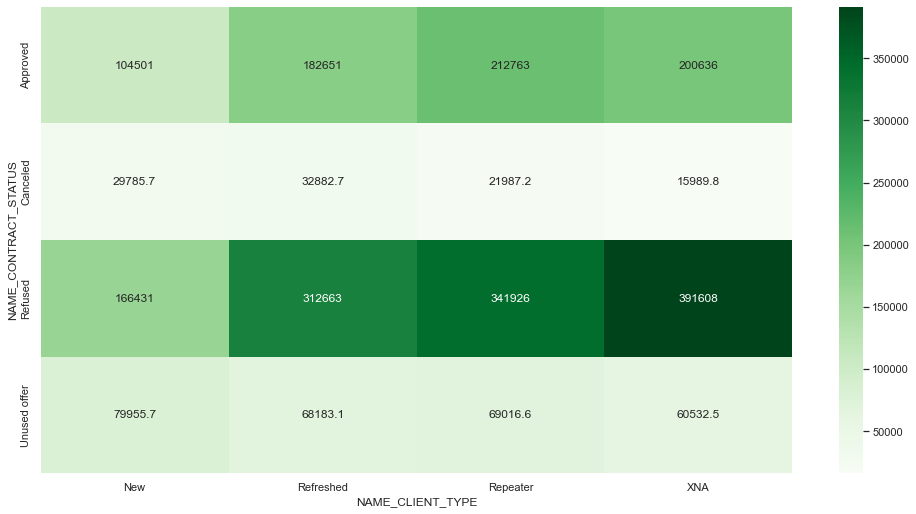

In [101]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=pre_app_data, 
                   index="NAME_CONTRACT_STATUS",
                   columns='NAME_CLIENT_TYPE',
                   values='AMT_APPLICATION')

plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

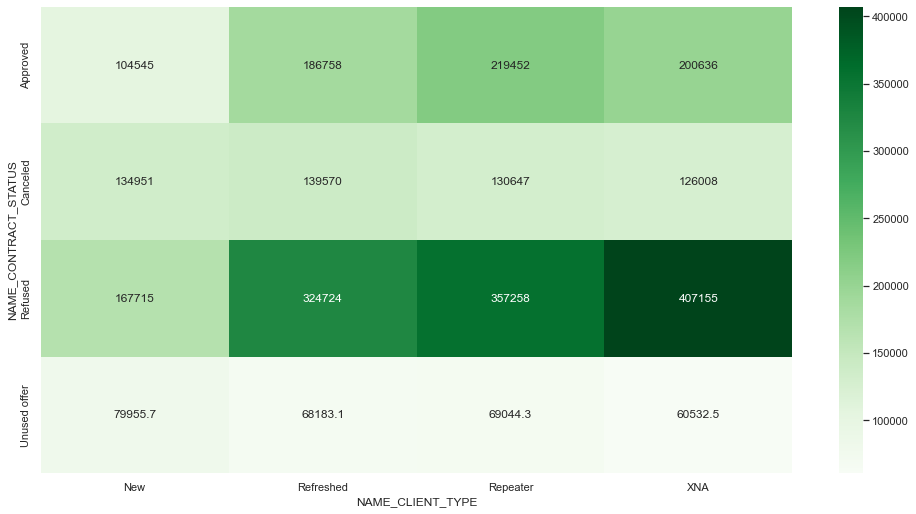

In [103]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=pre_app_data, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

Its seems to be all cancelled and refused cases have higher value of goods than other categories

# Conclusion:

- The variables below were set up as defaults in the analysis of the application dataframe. Checked against approved loans that have defaulted and proved to be correct.
-- Moderate income,25-35 age people followed 35-45 group people,Gender of  the applicant, Employement type, Occupation types, House type ae similar in both information.
- 
Other important factors to consider include the number of bureau hits in the past week, month, etc. A zero hit is good. The amount of income equivalent to the purchase of a good is also a concern. Past applications with rejected, cancelled, or unused loans also have defaults, which is a matter of concern. This indicates that the financial company may have rejected or cancelled the previous application but has approved the present one, and is now facing default on the same. Trusted applicants who have been rejected may have a lower loan amount, but this should not be a reason to not use them. Additional weightage should be given to women applicants as defaults are less. Students and business people are usually considered to be low-risk when it comes to repaying a loan. There are also cases in which people with previous rejected, cancelled, or unused loans are making their payments on time in the current application. This indicates that possibly wrong decisions were made in those cases.

# Performing Analysis by Merging Dataset

In the both dataset their one common key column given. we will perform by merging both dataset by SK_ID_CURR column for getting more insight from dataset. 

In [104]:
new_merge_dt = pd.merge(left=app_data,right=pre_app_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [105]:
new_merge_dt.head() # Getting data head

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER OWN_CAR OWN_REALTY  \
0      100002       1          Cash loans           M       N          Y   
1      100003       0          Cash loans           F       N          N   
2      100003       0          Cash loans           F       N          N   
3      100003       0          Cash loans           F       N          N   
4      100004       0     Revolving loans           M       Y          Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0             0          202500.0     406597.5       24700.5   
1             0          270000.0    1293502.5       35698.5   
2             0          270000.0    1293502.5       35698.5   
3             0          270000.0    1293502.5       35698.5   
4             0           67500.0     135000.0        6750.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied          Working   
1         1129500.0          Family    State servant   
2         1129500.0          Family    State servant   
3         1129500.0          Family    State servant   
4          135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.003541       16765          -1188            -1186.0   
3                    0.003541       16765          -1188            -1186.0   
4                    0.010032       19046           -225            -4260.0   

   DAYS_ID_PUBLISH  MOBIL  EMP_PHONE  WORK_PHONE  CONT_MOBILE  PHONE  EMAIL  \
0             2120      1          1           0            1      1      0   
1              291      1          1           0            1      1      0   
2              291      1          1           0            1      1      0   
3              291      1          1           0            1      1      0   
4             2531      1          1           1            1      1      0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_  \
0                            2                   WEDNESDAY   
1                            1                      MONDAY   
2                            1                      MONDAY   
3                            1                      MONDAY   
4                            2                      MONDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
1                        11                           0   
2                        11                           0   
3                        11                           0   
4                         9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4           

In [106]:
new_merge_dt.describe() # getting Statistical Values

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

        AMT_CREDIT_  AMT_ANNUITY_  AMT_GOODS_PRICE_  \
count  1.413701e+06  1.413608e+06      1.412493e+06   
mean   5.875537e+05  2.701702e+04      5.277186e+05   
std    3.849173e+05  1.395116e+04      3.532465e+05   
min    4.500000e+04  1.615500e+03      4.050000e+04   
25%    2.700000e+05  1.682100e+04      2.385000e+05   
50%    5.084955e+05  2.492550e+04      4.500000e+05   
75%    8.079840e+05  3.454200e+04      6.795000e+05   
max    4.050000e+06  2.250000e+05      4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   6.870203e+04   
std                  1.334702e-02  4.344557e+03   1.452777e+05   
min                  2.900000e-04  7.489000e+03  -1.791200e+04   
25%                  1.003200e-02  1.273900e+04  -2.828000e+03   
50%                  1.885000e-02  1.604400e+04  -1.281000e+03   
75%                  2.866300e-02  1.998000e+04  -2.840000e+02   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH      MOBIL     EMP_PHONE  \
count       1.413701e+06     1.413701e+06  1413701.0  1.413701e+06   
mean       -5.003233e+03     3.034563e+03        1.0  8.064393e-01   
std         3.551051e+03     1.507376e+03        0.0  3.950887e-01   
min        -2.467200e+04     0.000000e+00        1.0  0.000000e+00   
25%        -7.510000e+03     1.783000e+03        1.0  1.000000e+00   
50%        -4.508000e+03     3.330000e+03        1.0  1.000000e+00   
75%        -2.001000e+03     4.319000e+03        1.0  1.000000e+00   
max         0.000000e+00     7.197000e+03        1.0  1.000000e+00   

         WORK_PHONE   CONT_MOBILE         PHONE         EMAIL  \
count  1.413701e+06  1.413701e+06  1.413701e+06  1.413701e+06   
mean   1.822585e-01  9.992452e-01  2.828752e-01  7.242904e-02   
std    3.860576e-01  2.746247e-02  4.503965e-01  2.591971e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.413701e+06          1.413701e+06                 1.413701e+06   
mean      2.150501e+00          2.059638e+00                 2.037603e+00   
std       9.006787e-01          4.957797e-01                 4.886431e-01   
min       1.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
count              1.413701e+06                1.413701e+06   
mean               1.198433e+01                1.207327e-02   
std                3.232181e+00                1.092132e-01   
min                0.000000e+00                0.000000e+00   
25%                1.000000e+01                0.000000e+00   
50%    

In [107]:
new_merge_dt.shape       

(1413701, 102)

Its formed 1413701 rows and 102 columns

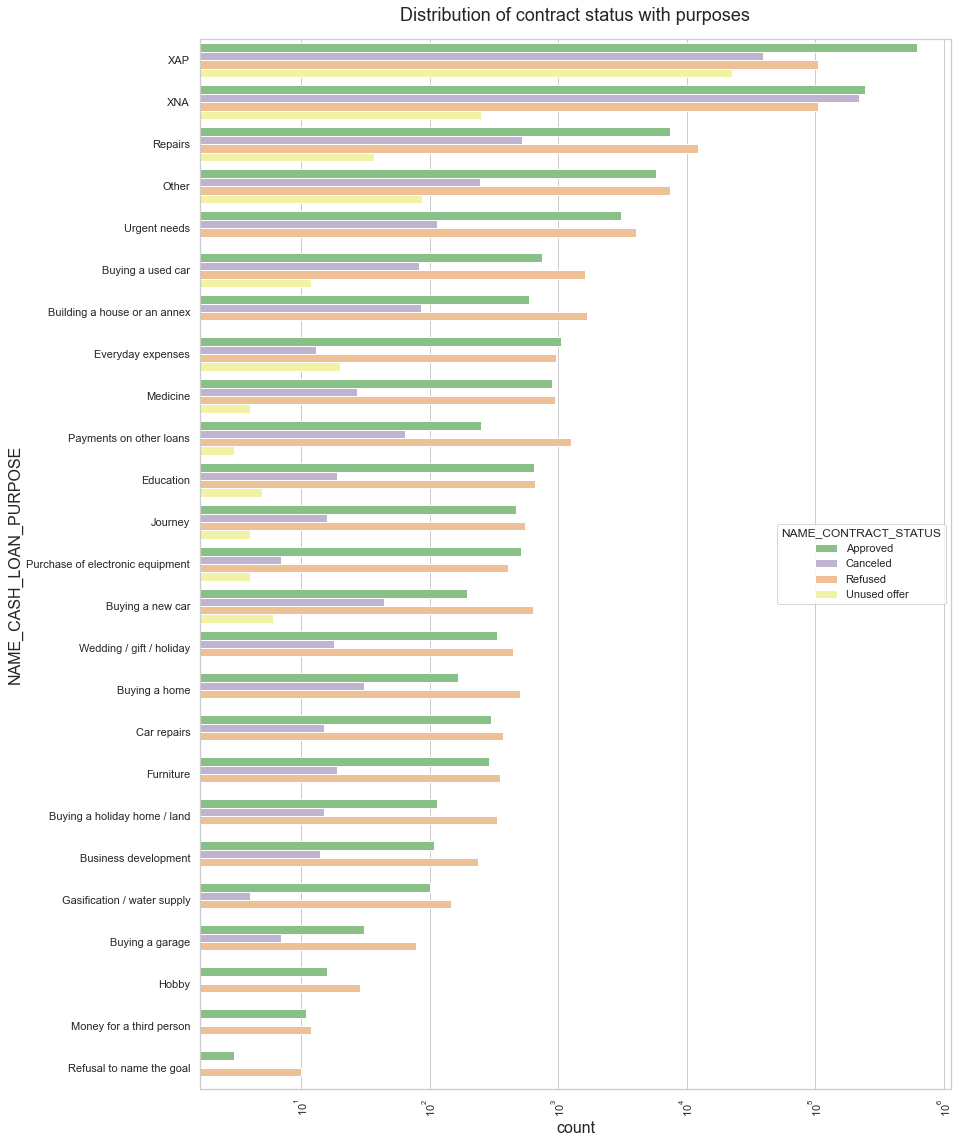

In [108]:
## Distribution of contract status in logarithmic scale
plt.figure(figsize=(12,18))
plt.rcParams["axes.labelsize"] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titlepad'] = 18
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_merge_dt , y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_merge_dt['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS', palette = 'Accent')
plt.show()

Most loan rejections came from the category of 'repairs', while an equal number of loans were approved and rejected for education purposes. Significantly more loan applications were rejected than approved for the purposes of paying off other loans or buying a new car.

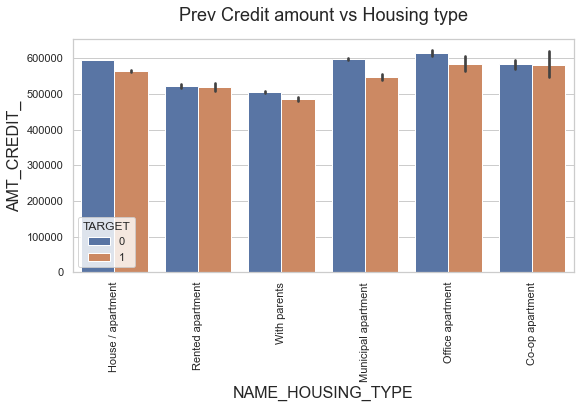

In [109]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.barplot(data =new_merge_dt, y='AMT_CREDIT_',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for housing types, office apartments have a higher target credit of 0 and co-op apartments have a higher target credit of1.Therefore, we can conclude that the bank should refrain from lending to housing type co-operative apartments as they face difficulties in payments. For successful distribution the bank can focus mainly on housing type including parent or house/apartment or municipal apartment.

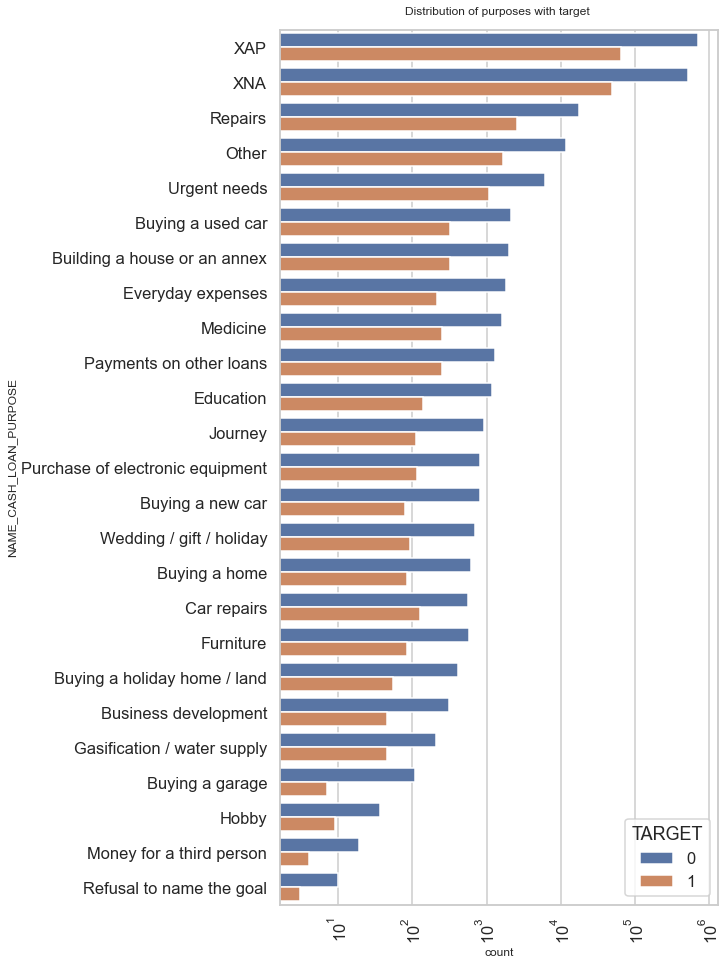

In [110]:
# Distribution of contract status
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(7,15))
plt.rcParams["axes.labelsize"] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_merge_dt, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_merge_dt['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

# Conclusion:
In order to be successful, banks should focus more on contract type ‘Student’, ‘Pensioner’ and ‘Businessman’ with housing type other than ‘Co-op apartment’. They should focus less on income type ‘Working’ as they are having the most number of unsuccessful payments. Loan purpose ‘Repair’ is also having a higher number of unsuccessful payments on time. Banks should try to get as many clients from housing type ‘With parents’ as they are having the least number of unsuccessful payments.